In [1]:
# import the library
# kernel must be [conda env:gl-env]
import graphlab as gl

In [2]:
import os
import urllib

##  Import data for the songs
songs = gl.SFrame.read_csv("../data/song_data.csv")

This non-commercial license of GraphLab Create for academic use is assigned to jnizzi@smu.edu and will expire on August 05, 2018.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: C:\Users\nizzi\AppData\Local\Temp\graphlab_server_1503179085.log.0


Finished parsing file C:\Users\nizzi\Documents\DataMiningProj\SMU-data-mining\data\song_data.csv

Parsing completed. Parsed 100 lines in 1.85979 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,str,str,long]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Read 637410 lines. Lines per second: 367585

Finished parsing file C:\Users\nizzi\Documents\DataMiningProj\SMU-data-mining\data\song_data.csv

Parsing completed. Parsed 1000000 lines in 2.04577 secs.

In [3]:
# Import the data for the plays per user per song
usage_data = gl.SFrame.read_csv("../data/kaggle_visible_evaluation_triplets.txt",
                                header=False,
                                delimiter='\t',
                                column_type_hints={'X3':int})

Finished parsing file C:\Users\nizzi\Documents\DataMiningProj\SMU-data-mining\data\kaggle_visible_evaluation_triplets.txt

Parsing completed. Parsed 100 lines in 1.64674 secs.

Read 844758 lines. Lines per second: 646644

Finished parsing file C:\Users\nizzi\Documents\DataMiningProj\SMU-data-mining\data\kaggle_visible_evaluation_triplets.txt

Parsing completed. Parsed 1450933 lines in 1.78872 secs.

In [5]:
# Review the header of the song data
songs.head()

song_id,title,release,artist_name,year
SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze PresentsWinter Sessions ...,Der Mystic,0
SOZVAPQ12A8C13B63C,"Symphony No. 1 G minor""Sinfonie ...",Berwald: Symphonies Nos.1/2/3/4 ...,David Montgomery,0
SOQVRHI12A6D4FB2D7,We Have Got Love,Strictly The Best Vol. 34,Sasha / Turbulence,0
SOEYRFT12AB018936C,2 Da Beat Ch'yall,Da Bomb,Kris Kross,1993
SOPMIYT12A6D4F851E,Goodbye,Danny Boy,Joseph Locke,0
SOJCFMH12A8C13B0C2,Mama_ mama can't you see? ...,March to cadence with theUS marines ...,The Sun Harbor's Chorus-Documentary Recordings ...,0


In [6]:
#Review data for the usage.   
usage_data

X1,X2,X3
fd50c4007b68a3737fe052d5a4f78ce8aa117f3d ...,SOBONKR12A58A7A7E0,1
fd50c4007b68a3737fe052d5a4f78ce8aa117f3d ...,SOEGIYH12A6D4FC0E3,1
fd50c4007b68a3737fe052d5a4f78ce8aa117f3d ...,SOFLJQZ12A6D4FADA6,1
fd50c4007b68a3737fe052d5a4f78ce8aa117f3d ...,SOHTKMO12AB01843B0,1
fd50c4007b68a3737fe052d5a4f78ce8aa117f3d ...,SODQZCY12A6D4F9D11,1
fd50c4007b68a3737fe052d5a4f78ce8aa117f3d ...,SOXLOQG12AF72A2D55,1
d7083f5e1d50c264277d624340edaaf3dc16095b ...,SOUVUHC12A67020E3B,1
d7083f5e1d50c264277d624340edaaf3dc16095b ...,SOUQERE12A58A75633,1
d7083f5e1d50c264277d624340edaaf3dc16095b ...,SOIPJAX12A8C141A2D,1
d7083f5e1d50c264277d624340edaaf3dc16095b ...,SOEFCDJ12AB0185FA0,2


In [7]:
# Change data labels to be human readable 
usage_data.rename({'X1':'user', 'X2': 'song_id', 'X3': 'plays'})

user,song_id,plays
fd50c4007b68a3737fe052d5a4f78ce8aa117f3d ...,SOBONKR12A58A7A7E0,1
fd50c4007b68a3737fe052d5a4f78ce8aa117f3d ...,SOEGIYH12A6D4FC0E3,1
fd50c4007b68a3737fe052d5a4f78ce8aa117f3d ...,SOFLJQZ12A6D4FADA6,1
fd50c4007b68a3737fe052d5a4f78ce8aa117f3d ...,SOHTKMO12AB01843B0,1
fd50c4007b68a3737fe052d5a4f78ce8aa117f3d ...,SODQZCY12A6D4F9D11,1
fd50c4007b68a3737fe052d5a4f78ce8aa117f3d ...,SOXLOQG12AF72A2D55,1
d7083f5e1d50c264277d624340edaaf3dc16095b ...,SOUVUHC12A67020E3B,1
d7083f5e1d50c264277d624340edaaf3dc16095b ...,SOUQERE12A58A75633,1
d7083f5e1d50c264277d624340edaaf3dc16095b ...,SOIPJAX12A8C141A2D,1
d7083f5e1d50c264277d624340edaaf3dc16095b ...,SOEFCDJ12AB0185FA0,2


#### Attempt to add in the Song Title

In [8]:
###Create the data to dataframes
ud_df = usage_data.to_dataframe()
song_df = songs.to_dataframe()

new_df = ud_df.merge(song_df, how='left', left_on='song_id', right_on='song_id')


In [40]:
new_df.head()

,user,song_id,plays,title,release,artist_name,year
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1,You're The One,If There Was A Way,Dwight Yoakam,1990
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1,Horn Concerto No. 4 in E flat K495: II. Romanc...,Mozart - Eine kleine Nachtmusik,Barry Tuckwell/Academy of St Martin-in-the-Fie...,0
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1,Tive Sim,Nova Bis-Cartola,Cartola,1974
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1,Catch You Baby (Steve Pitron & Max Sanna Radio...,Catch You Baby,Lonnie Gordon,0
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1,El Cuatrero,From Argentina To The World,Miguel Calo,2001


### Add in the categories then group by the categories

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Create the category function
def f(row):
    if row['plays'] <= 1:
        val = ' 0-1'
    elif row['plays'] <= 5:
        val = ' 2-5'
    elif row['plays'] <= 10:
        val =  ' 6-10'
    elif row['plays'] <= 50:
        val =  '11-50'
    elif row['plays'] <= 75:
        val =  '51-75'
    elif row['plays'] >75:
        val =  'Greater than 75'
    return val



In [10]:
#Apply the category function 
new_df['category'] = new_df.apply(f, axis=1)

#Confirm the new category added
new_df.head()

,user,song_id,plays,title,release,artist_name,year,category
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1,You're The One,If There Was A Way,Dwight Yoakam,1990,0-1
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1,Horn Concerto No. 4 in E flat K495: II. Romanc...,Mozart - Eine kleine Nachtmusik,Barry Tuckwell/Academy of St Martin-in-the-Fie...,0,0-1
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1,Tive Sim,Nova Bis-Cartola,Cartola,1974,0-1
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1,Catch You Baby (Steve Pitron & Max Sanna Radio...,Catch You Baby,Lonnie Gordon,0,0-1
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1,El Cuatrero,From Argentina To The World,Miguel Calo,2001,0-1


In [11]:
#Group by categories

pie_chart = new_df.groupby(by=['category'])[['plays']].count().reset_index()

pie_chart.head()

,category,plays
0,0-1,862354
1,2-5,451292
2,6-10,100857
3,11-50,72879
4,51-75,2699


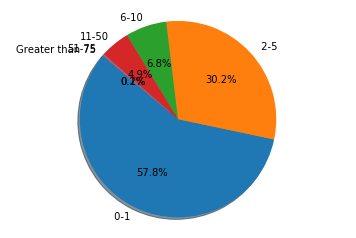

In [12]:
#Plot

plt.pie(pie_chart['plays'], labels=pie_chart['category'], autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

### create a new df with user, artist, and plays

In [13]:
df_artist = new_df.groupby(by=['user','artist_name','category'])[['plays']].sum().reset_index()

df_artist.head()

,user,artist_name,category,plays
0,00007a02388c208ea7176479f6ae06f8224355b3,Dredg,2-5,3
1,00007a02388c208ea7176479f6ae06f8224355b3,Local H,0-1,1
2,00007a02388c208ea7176479f6ae06f8224355b3,M83,2-5,2
3,00007a02388c208ea7176479f6ae06f8224355b3,No Doubt,0-1,1
4,00007a02388c208ea7176479f6ae06f8224355b3,Pantera,0-1,1


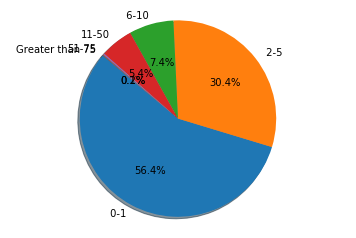

In [15]:
#Group by categories

art_pc = df_artist.groupby(by=['category'])[['plays']].count().reset_index()

art_pc.head()
plt.pie(art_pc['plays'], labels=art_pc['category'], autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

### Convert the df back to sframe

In [16]:
###Add the data back to SFrame (both song and artist)

combo_songs = gl.SFrame(new_df)
artist = gl.SFrame(df_artist)

In [20]:
###Confirm both Sframea are ok

combo_songs.head()


user,song_id,plays,title,release
fd50c4007b68a3737fe052d5a4f78ce8aa117f3d ...,SOBONKR12A58A7A7E0,1,You're The One,If There Was A Way
fd50c4007b68a3737fe052d5a4f78ce8aa117f3d ...,SOEGIYH12A6D4FC0E3,1,Horn Concerto No. 4 in Eflat K495: II. Romance ...,Mozart - Eine kleineNachtmusik ...
fd50c4007b68a3737fe052d5a4f78ce8aa117f3d ...,SOFLJQZ12A6D4FADA6,1,Tive Sim,Nova Bis-Cartola
fd50c4007b68a3737fe052d5a4f78ce8aa117f3d ...,SOHTKMO12AB01843B0,1,Catch You Baby (StevePitron & Max Sanna Radio ...,Catch You Baby
fd50c4007b68a3737fe052d5a4f78ce8aa117f3d ...,SODQZCY12A6D4F9D11,1,El Cuatrero,From Argentina To TheWorld ...
fd50c4007b68a3737fe052d5a4f78ce8aa117f3d ...,SOXLOQG12AF72A2D55,1,Unite (2009 DigitalRemaster) ...,Hello Nasty (RemasteredEdition) ...
d7083f5e1d50c264277d624340edaaf3dc16095b ...,SOUVUHC12A67020E3B,1,Lift Me Up,Lift Me Up EP
d7083f5e1d50c264277d624340edaaf3dc16095b ...,SOUQERE12A58A75633,1,Living In A Lie,Planet Of The Apes - BestOf Guano Apes ...
d7083f5e1d50c264277d624340edaaf3dc16095b ...,SOIPJAX12A8C141A2D,1,Open Your Eyes,Nice 90s
d7083f5e1d50c264277d624340edaaf3dc16095b ...,SOEFCDJ12AB0185FA0,2,Kurtizana,Bud a nebe


In [21]:
artist.head()

user,artist_name,category,plays
00007a02388c208ea7176479f6ae06f8224355b3 ...,Dredg,2-5,3
00007a02388c208ea7176479f6ae06f8224355b3 ...,Local H,0-1,1
00007a02388c208ea7176479f6ae06f8224355b3 ...,M83,2-5,2
00007a02388c208ea7176479f6ae06f8224355b3 ...,No Doubt,0-1,1
00007a02388c208ea7176479f6ae06f8224355b3 ...,Pantera,0-1,1
00007a02388c208ea7176479f6ae06f8224355b3 ...,Sam Sparro,0-1,2
00007a02388c208ea7176479f6ae06f8224355b3 ...,Stone Temple Pilots,0-1,1
00007a02388c208ea7176479f6ae06f8224355b3 ...,Stone Temple Pilots,2-5,2
00014a76ed063e1a749171a253bca9d9a0ff1782 ...,Angels and Airwaves,2-5,4
00014a76ed063e1a749171a253bca9d9a0ff1782 ...,Moodymann,2-5,2


In [27]:
combo_songs.show()

Canvas is accessible via web browser at the URL: http://localhost:2987/index.html
Opening Canvas in default web browser.


In [24]:
artist.show()

Canvas is accessible via web browser at the URL: http://localhost:2987/index.html
Opening Canvas in default web browser.


In [35]:
combo_songs['user'].num_missing()

0

In [36]:
combo_songs['song_id'].num_missing()

0

In [37]:
combo_songs['plays'].num_missing()

0

In [38]:
combo_songs['artist_name'].num_missing()

0

The song data includes over 110,000 users listening to over 166,433 unique songs.   The data includes 138,499 unqiue song titles.   The inference is 27,934 songs have the same title although they are different songs.   Songs were played between 1 times and 923 times.  Both the song data as well as the artist data contain 28,266 unique artists.   Neither dataset is missing values.    

Since the user identification is based on a user ID, the possiblities of a single person having multiple user IDs or a single user ID being used by multiple individuals cannot be eliminated.   Since the sharing of user IDs 

In [ ]:
#recommendation model based on the song ID

model = gl.recommender.create(combo_songs, user_id = "user", item_id="song_id", target = "plays")
results = model.recommend(users=None, k=5)
model.save("song_model")

In [41]:
results # the recommendation output

user,song_id,score,rank
fd50c4007b68a3737fe052d5a4f78ce8aa117f3d ...,SONVPTP12A6D4F7A34,22.3896967845,1
fd50c4007b68a3737fe052d5a4f78ce8aa117f3d ...,SOPUCYA12A8C13A694,21.4853674846,2
fd50c4007b68a3737fe052d5a4f78ce8aa117f3d ...,SOUCAJA12AB0187236,20.4468581157,3
fd50c4007b68a3737fe052d5a4f78ce8aa117f3d ...,SOJFQWU12A8C1448C7,19.922541328,4
fd50c4007b68a3737fe052d5a4f78ce8aa117f3d ...,SOWOQPD12A8C136EF6,19.481720634,5
d7083f5e1d50c264277d624340edaaf3dc16095b ...,SOJSXJY12A8C13E32E,22.011936851,1
d7083f5e1d50c264277d624340edaaf3dc16095b ...,SOXTUWG12AB018A2E2,20.4168536144,2
d7083f5e1d50c264277d624340edaaf3dc16095b ...,SOPMHHE12AB01845F6,17.9960047679,3
d7083f5e1d50c264277d624340edaaf3dc16095b ...,SOVGLTY12AF72A39CD,16.2818037944,4
d7083f5e1d50c264277d624340edaaf3dc16095b ...,SOBZZER12A6D4F7FA6,15.7568461375,5


Above shows the top 5 ratings for each user

In [ ]:
results

https://turi.com/products/create/docs/generated/graphlab.recommender.item_similarity_recommender.ItemSimilarityRecommender.html
jaccard = when only if rated is needed not what the rating is
cosine = does not consider the differences in the mean and var of the ratings
pearson = effects of means and variance have been removed

In [ ]:
song_rec = gl.recommender.item_similarity_recommender.create(combo_songs,
                                                             user_id="user",
                                                             item_id="song_id",
                                                             target="plays",
                                                             only_top_k=3,
                                                             similarity_type="cosine")

song_results = song_rec.get_similar_items(k=3)
song_results.head

In [ ]:
artist_rec = gl.recommender.item_similarity_recommender.create(artist,
                                                             user_id="user",
                                                             item_id="artist_name",
                                                             target="plays",
                                                             only_top_k=3,
                                                             similarity_type="cosine")

artist_results = artist_rec.get_similar_items(k=3)
artist_results.head

In [ ]:
#Break the data - train test - by user:  80% to train.  20% to test.   limit to 100 user for the real time for this example
#song data
train_song, test_song = gl.recommender.util.random_split_by_user(combo_songs,
                                                      user_id="user", item_id="song_id",
                                                      item_test_proportion=0.2)

In [ ]:
from IPython.display import display
from IPython.display import Image

gl.canvas.set_target('ipynb')

item_item = gl.recommender.item_similarity_recommender.create(train_song,
                                                             user_id="user",
                                                             item_id="song_id",
                                                             target="plays",
                                                             only_top_k=5,
                                                             similarity_type="cosine")

rmse_results = item_item.evaluate(test)


In [ ]:
#print rmse_results ('rmse_by_item')
print rmse_results.viewkeys()


In [ ]:
rmse_results['rmse_overall']

In [ ]:
rmse_results['rmse_by_user']

In [ ]:
rmse_results['rmse_by_item']

In [ ]:
#look at distribution of values from the rmse

from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

rmsevals = rmse_results['rmse_by_item']['rmse']

plt.hist(rmsevals, bins=20)
plt.title('RMSE by Song')
plt.show()

In [ ]:
#look at distribution of values from the rmse

from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

rmsevals = rmse_results['rmse_by_user']['rmse']
rmsevals = rmsevals[rmse_results['rmse_by_user']['count']>10]


plt.hist(rmsevals, bins=20)
plt.title('RMSE by User')
plt.show()

In [ ]:
rmse_results['rmse_by_user']

In [ ]:
#looking at recall and precision
rmse_results['precision_recall_by_user']

In [ ]:
#do the aggregate

import graphlab.aggregate as agg

# we will be using these aggregations
agg_list = [ agg.AVG('precision'),agg.STD('precision'),agg.AVG('recall'),agg.STD('recall')]

# apply these functions to each group(group the restuls by 'k' which is the cutoff)
# the cutoff is the number of top items to look for 
# https://dato.com/products/create/docs/generated/graphlab.recommender.util.precision_recall_by_user.html#

rmse_results['precision_recall_by_user'].groupby('cutoff',agg_list)

## Cross Validated Collaborative Filtering

In [ ]:
recl = gl.recommender.ranking_factorization_recommender.create(train,
                                                             user_id="user",
                                                             item_id="song_id",
                                                             target="plays")

rmse_results = recl.evaluate(test)

In [ ]:
rmse_results['precision_recall_by_user'].groupby('cutoff',[agg.AVG('precision'),agg.STD('precision'),agg.AVG('recall')])
# actually made it worse

In [ ]:
recl = gl.recommender.ranking_factorization_recommender.create(train,
                                                             user_id="user",
                                                             item_id="song_id",
                                                             target="plays",
                                                              num_factors=16,  #override default
                                                              regularization=1e-02,
                                                              linear_regularization = 1e-3)

rmse_results = recl.evaluate(test)

In [ ]:
rmse_results['precision_recall_by_user'].groupby('cutoff',[agg.AVG('precision'),agg.STD('precision'),agg.AVG('recall')])

## Is this better than the item item matrix

In [ ]:
comparison = gl.recommender.util.compare_models(test, [item_item, recl])

In [ ]:
comparisonstruct = gl.compare(test, [item_item, recl])

In [ ]:
gl.show_comparison(comparisonstruct,[item_item, recl])

User item_item matrix for anything more than 1

## Parameters, Parameters
# RUNNING FOR 5 MODELS IS TIME CONSUMING.   TIME 

In [ ]:
#Run moving the # of models to 3 for time.

params = {'user_id': 'user',
         'item_id': 'song_id',
         'target': 'plays',
         'num_factors': [8, 12, 16, 24, 32],
         'regularization': [0.001] ,
         'linear_regularization': [0.001]}

job = gl.model_parameter_search.create( (train,test),
                                      gl.recommender.ranking_factorization_recommender.create,
                                      params,
                                      max_models=5,
                                      environment=None)

# also note this evaluator also support sklearn
# https://dato.com/products/create/docs/generated/graphlab.toolkits.model_parameter_search.create.html
# None means it is locally hosted

In [ ]:
job.get_status()

In [ ]:
job_result = job.get_results()

job_result.head()

In [ ]:
bst_prms = job.get_best_params()
bst_prms
# the restuls show 4 neg sample and 24 factors (his was 12)

In [ ]:
models = job.get_models()
models

In [ ]:
comparisonstruct = gl.compare(test,models)
gl.show_comparison(comparisonstruct,models)

In [ ]:
models[1]

most are the similar.   when cut off less than 10 - about the same.   
can do machine learning.  see the code below for the function that is your friend. - supports sklearn

many features for the item

Some referencence
https://chrisalbon.com/python/matplotlib_pie_chart.html
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.pivot_table.html
    